In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from skimage import data,filters
import scipy.ndimage as ndimage
import numpy as np
from PIL import Image
from math import floor, ceil
import cv2
import os
import math
import random
import pandas as pd
image_dir = "../../CVassignment5_files"
p = 112
q = 92
rand_int = random.randint(0,40)

# Question 1
## 1a

In [54]:
training_path = f"{image_dir}/problem1_files/faces_training"
test_path = f"{image_dir}/problem1_files/faces_test"
training_images = [plt.imread(f"{training_path}/{x}") for x in os.listdir(training_path)]

alpha = 20

def lower_rank_SVD(image, al):
    U, S, V = np.linalg.svd(image, full_matrices=False)
    S[al:] = 0
    S = np.diag(S)
    return U, S, V

def get_a(training_images):
    a_ = np.zeros(training_images[0].shape[0] * training_images[0].shape[1])
    for image in training_images:
        U, S, V = lower_rank_SVD(image, alpha)
        a_ = a_ + image.flatten()
    a_ = a_/len(training_images)
    return a_

def get_X(training_images, a_):
    X = np.array(np.zeros(len(a_)))
    X = np.transpose([X])
    for image in training_images:
        fi = image.flatten()
        x = fi - a_
        x = np.transpose([x])
        X = np.hstack((X, x))
    X = np.delete(X, 0, 1)
    return X/np.sqrt(len(training_images))

def get_SVD(X, alpha):
    U, S, V = np.linalg.svd(X)
    return U, S, V

def display_eigenfaces(U, alpha):
    for i in range(0, alpha):
        eig = np.transpose([U[:,i]])
        eig = eig - np.min(eig)
        eig = eig/np.max(eig)
        eig = (255*eig).astype(np.uint8)
        eig = eig.reshape(p, q)
        plt.imshow(eig, cmap='gray')
        plt.show()


In [55]:
X = get_X(training_images, a_)
U, S, V = get_SVD(X, alpha)
U_alpha = U[:,:alpha]

Singular values:


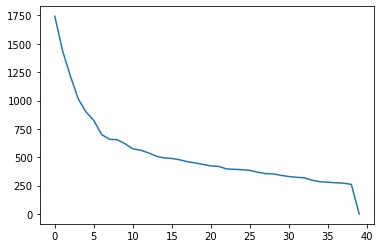

In [56]:
print("Singular values:")
plt.plot(S)
plt.show()

Average Vector:


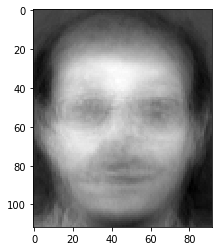

In [57]:
a_ = get_a(training_images)
print("Average Vector:")
plt.imshow(a_.reshape(p, q).astype(np.uint8), cmap='gray')
plt.show()

Eigenfaces:


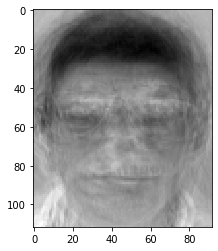

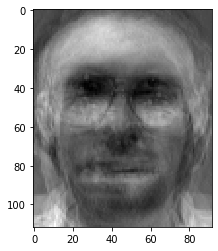

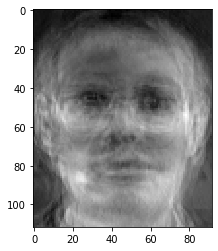

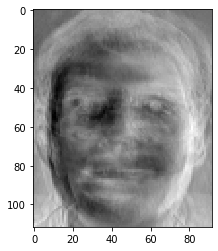

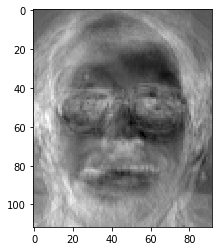

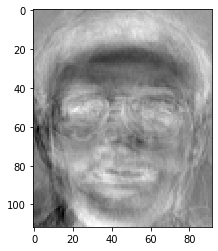

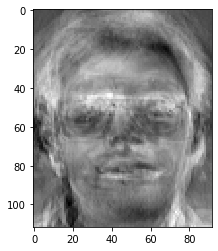

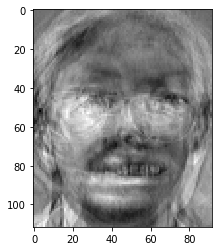

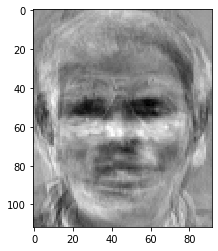

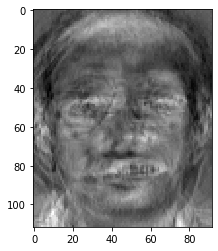

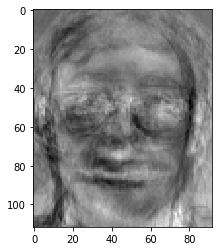

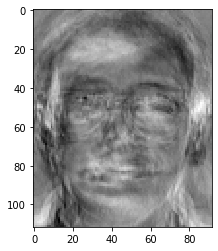

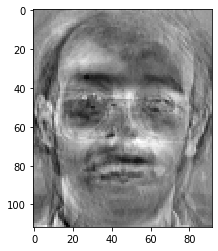

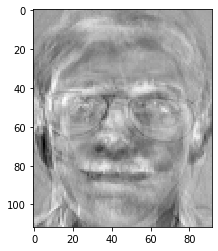

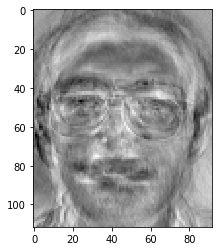

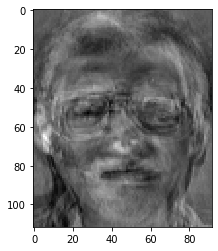

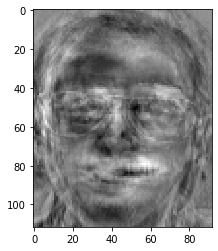

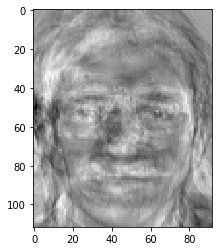

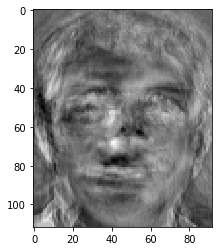

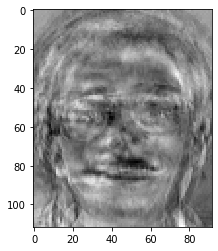

In [58]:
print("Eigenfaces:")
display_eigenfaces(U_alpha, alpha)

## 1b

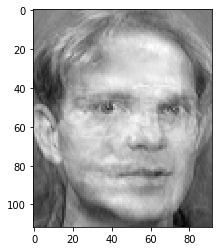

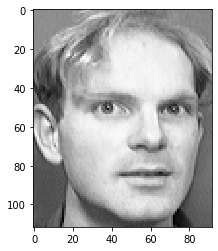

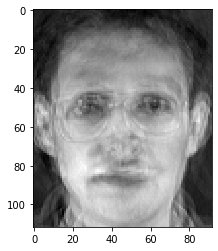

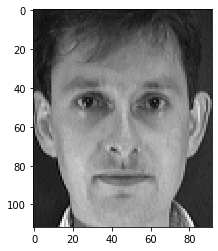

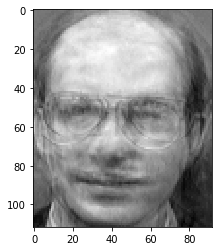

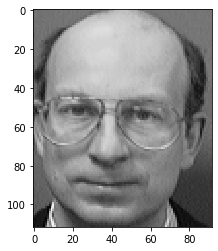

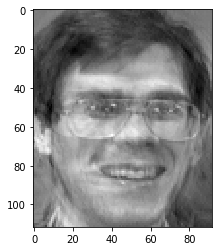

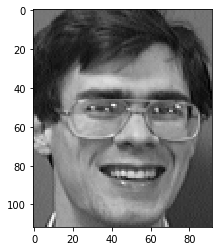

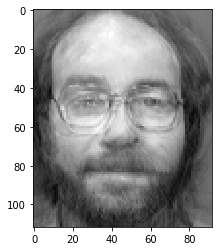

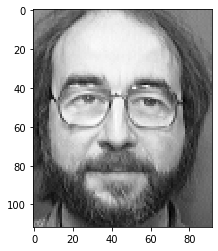

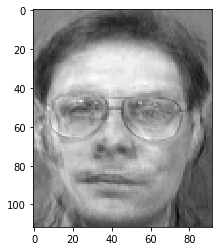

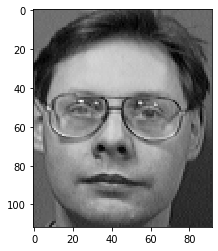

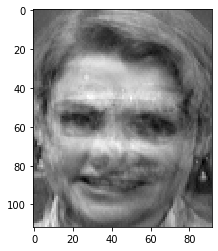

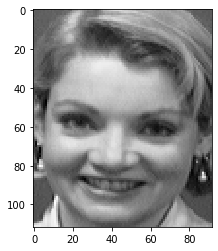

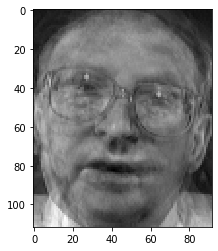

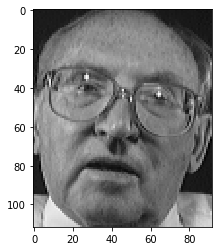

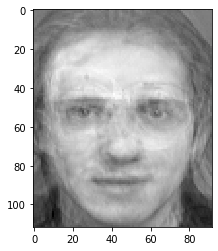

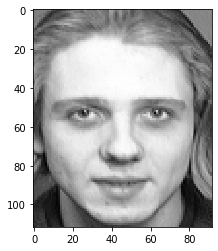

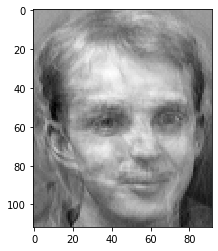

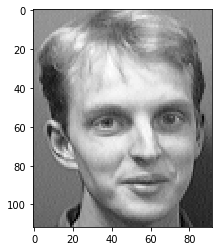

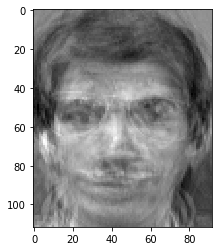

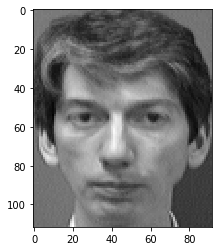

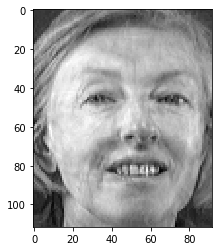

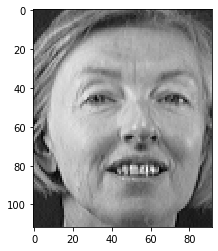

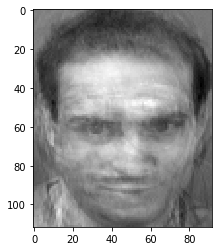

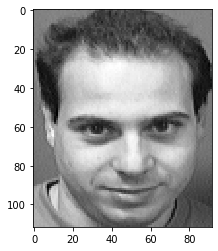

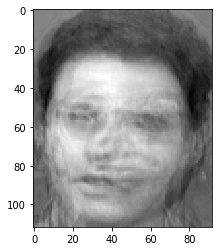

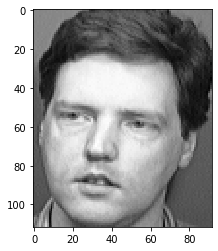

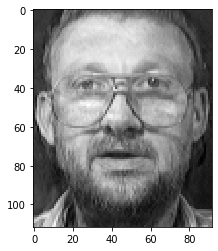

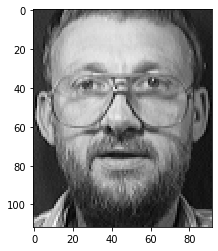

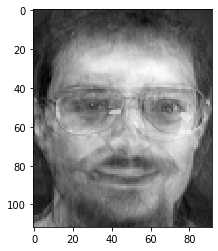

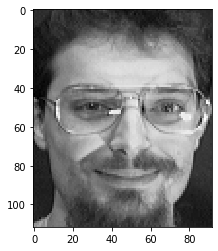

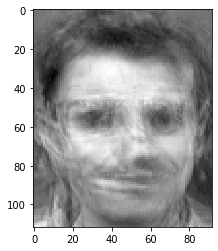

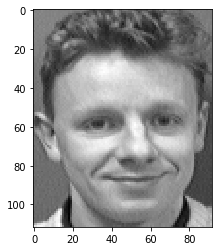

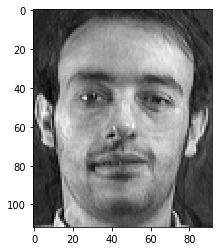

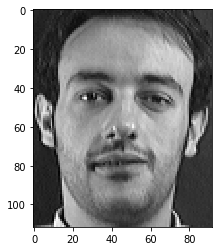

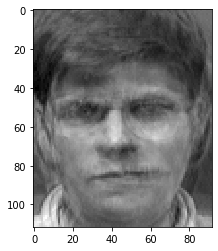

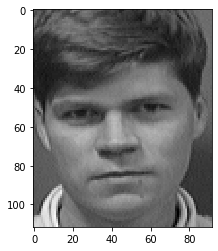

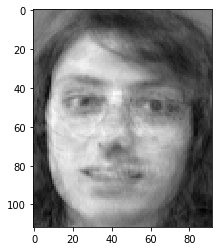

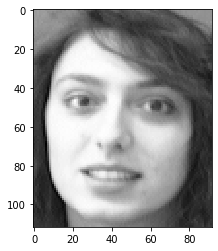

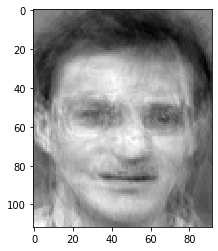

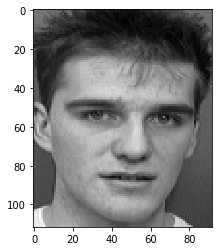

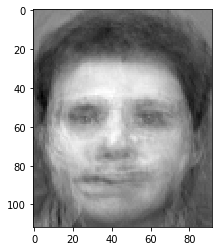

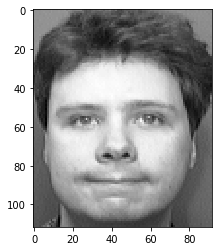

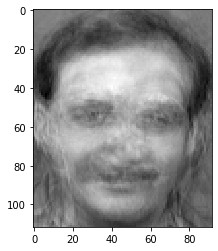

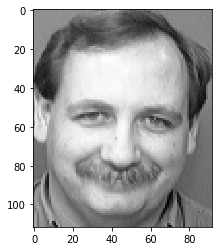

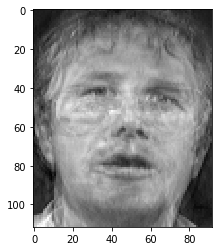

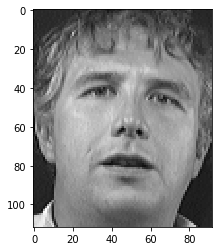

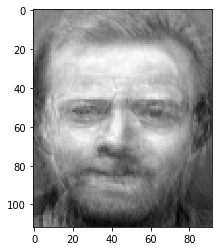

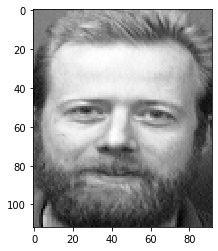

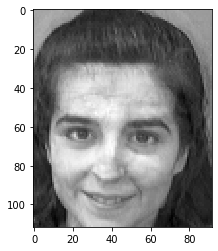

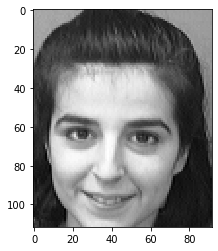

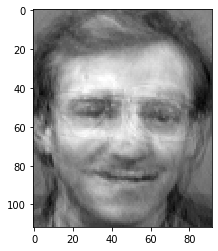

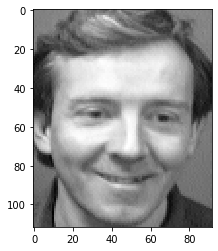

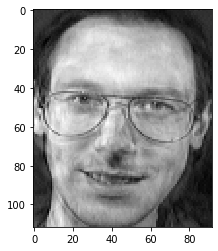

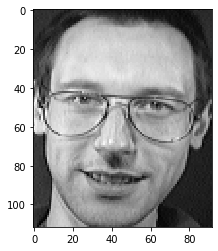

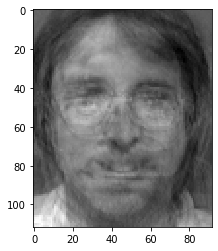

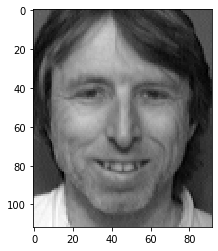

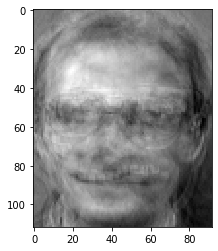

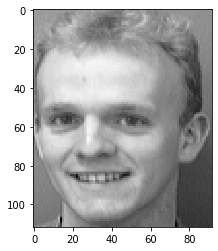

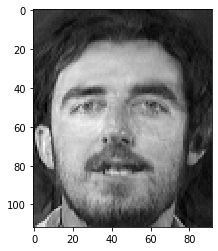

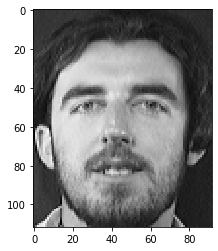

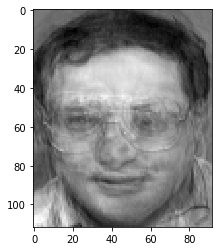

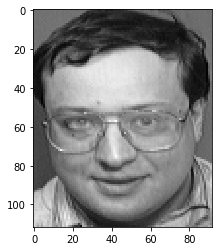

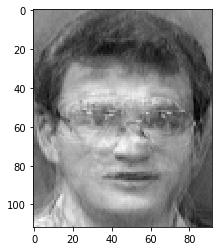

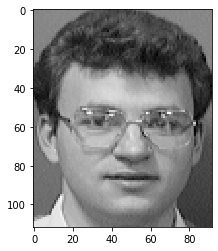

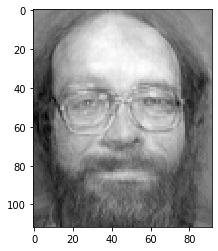

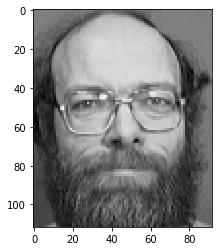

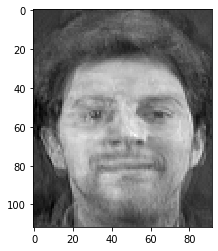

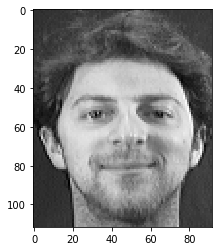

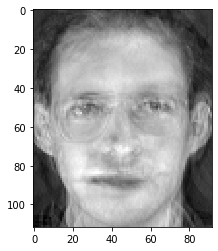

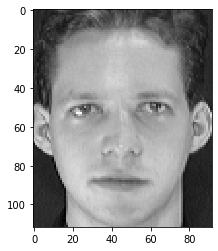

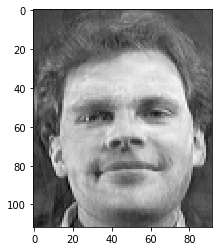

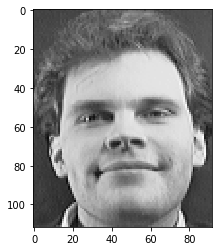

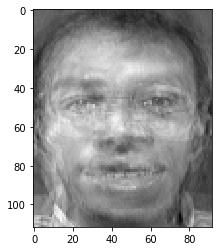

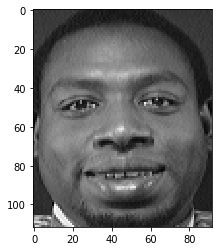

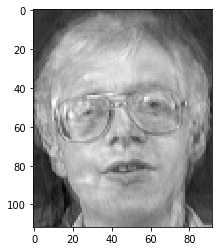

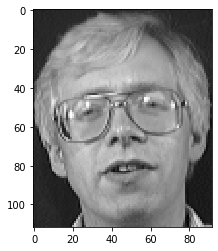

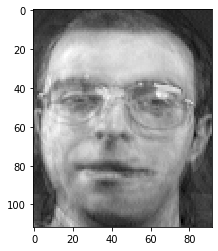

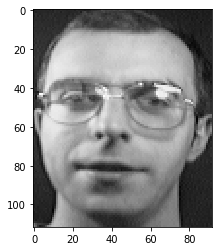

In [59]:
for image in training_images:
    f = image.flatten()
    y = np.matmul(U_alpha.T, np.transpose([(f - a_)]))
    f_ = np.matmul(U_alpha, y) + np.transpose([a_])
    f_ = f_.reshape(p,q)
    plt.imshow(f_, cmap="gray")
    plt.show()
    plt.imshow(image, cmap="gray")
    plt.show()